In [125]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # for plot legend in plots
from matplotlib.pylab import subplots
from matplotlib import figure
from math import pi
import pylab as plot

#alldata = players_dataframe
alldata = pd.read_csv('player_attributes.csv')
alldata
#alldata = player_attr_dataframe
#alldata.loc['mean']=player_attr_dataframe.mean()
#alldata

#striker
Attacking = np.array(['Dribbling','Volleys','Finishing','Short Passing','Heading Accuracy'])
MovementandPower = np.array(['Sprint Speed','Reactions','Positioning','Agility','Shot Power','Stamina'])
#midfielder
Midfielding = np.array(['Short Passing','Dribbling','Ball Control','Long Passing','Crossing'])
PowerandMentality = np.array(['Long Shots','Stamina','Balance','Strength','Vision'])
#defender
#mentality = np.array(['Aggression','Interceptions','Positioning','Vision','Penalties','Composure'])
Defending = np.array(['Marking','Standing Tackle','Sliding Tackle','Strength','Interceptions'])
#goalkeeper
GoalKeeping = np.array(['GK Diving','GK Handling','GK Kicking','GK Reflexes','GK Reflexes'])

# define player need
playercat = np.array(['Striker','Midfielder','Defender'])

# dictions
# striker
sdic = {'Attacking':Attacking,'Movement and Power':MovementandPower}
# midfielder
mdic = {'Midfielding':Midfielding,'Power and Mentality':PowerandMentality}
# defender
ddic = {'Defending':Defending}
# goalkeeper
gdic = {'GoalKeeping':GoalKeeping}

def plot_all_3players(num):  # final function for all plots by player location
    '''
    head : the top numbers wanted to analyze
    num : list, insert numbers of players 
    '''
    for elem in playercat: # iterate over player kind. elem is : striker, midfielder, defender
        character = elem
        top_character(character,elem,num)
        
def plot_goalkeeper(num):  # final function for all plots by player location
    '''
    head : the top numbers wanted to analyze
    num : list, insert numbers of players 
    '''
    elem = 'GoalKeeper'
    character = elem
    #color = ''
    top_character(character,elem,num)

def top_character(character,elem,num): # analyzation of top striker, defender, midfielder, select numbers wanted and characters 
    '''
    head : top numbers of players want to analyse
    type : int , range 1-1000
    character: choose from attack, skill, movement, power, mentality,defending, goalkeeping
    type : string
    this plot do not include Goalkeeper, use function top_character_player for it
    '''
    if character == 'Striker':
        #color = 'r'
        for key in sdic:   # key : 'Attacking', 'MovementandPower'
            attri = key
            labels = sdic[key]
            plot_player_character(elem,labels,num,character,attri)
            
    if character == 'Midfielder':
        #color = 'b'
        for key in mdic: # key : 'Midfielding','PowerandMentality'
            attri = key
            labels = mdic[key]
            plot_player_character(elem,labels,num,character,attri)
    
    if character == 'Defender':
        #color = 'g'
        for key in ddic: # key : 'Defending'
            attri = key
            labels = ddic[key]
            plot_player_character(elem,labels,num,character,attri)
    
    if character == 'GoalKeeper':
        for key in gdic: # key : 'GoalKeeping'
            attri = key
            labels = gdic[key]
            plot_player_character(elem,labels,num,character,attri)
 
        

def plot_player_character(elem,labels,num,character,attri):  # radar plotting in general
    '''
    elem : palyer category 'Striker','Midfielder','Defender',
    type : strings
    labels : sublables of the character you want to analyse
    type : array
    num : numbers of players you want to analyse
    type : int
    character: choose from attack, skill, movement, power, mentality,defending, goalkeeping
    type : string
    head : top numbers of players you want to analyse
    type ： int , range 1-1000
    '''
    '''
    num = [50,200,1000]
    for number in num:
        all contents below    
    '''
    #fig = plt.figure()
    fig,ax=subplots(figsize=(7,7))
    ax.axis('off')
    ax = fig.add_subplot(111,polar =True) #set polar axis
    import matplotlib as mpl
    mpl.rcParams['font.size'] = 9.0
    for i in range(len(num)):
        number = num[i]
        alldata.loc['mean'] = alldata.head(number).mean()
        alldata.loc['Striker'] = alldata[alldata['Player Category']=='Striker'].head(number).mean()
        alldata.loc['Midfielder'] = alldata[alldata['Player Category']=='Midfielder'].head(number).mean()
        alldata.loc['Defender'] = alldata[alldata['Player Category']=='Defender'].head(number).mean()
        alldata.loc['GoalKeeper'] = alldata[alldata['Player Category']=='GoalKeeper'].head(number).mean()

    # ploting
        if number == num[0]:
            color = 'r'
        if number == num[1]:
            color = 'b'
        if number == num[2]:
            color = 'g'
                
        stats = alldata.loc[elem, labels].values   # get values as selected
        angles = np.linspace(0,2*np.pi,len(labels),endpoint = False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))
            
            #fig = plt.figure()
        #ax = fig.subplot(111,polar =True) #set polar axis
        #ax = axs[i]
        ax.set_ylim(50,100)   #set limits of axis
        ax.plot(angles, stats,color,linewidth = 1.75,label = num[i]) # draw the plot
            #ax.fill(angles, stats, color,alpha = 0.1) #fill the area
        ax.set_thetagrids(angles*180/np.pi, labels)
        ax.set_title(str(attri)+ ' Attributes of '+str(elem))
        ax.grid(True)
        mpl.rcParams['font.size'] = 17 # change label size
        params = {'legend.fontsize': 12,'legend.handlelength': 2} #change legend size
        plot.rcParams.update(params)
        plt.legend(loc='upper right',bbox_to_anchor=(0.1, 0.1))



        

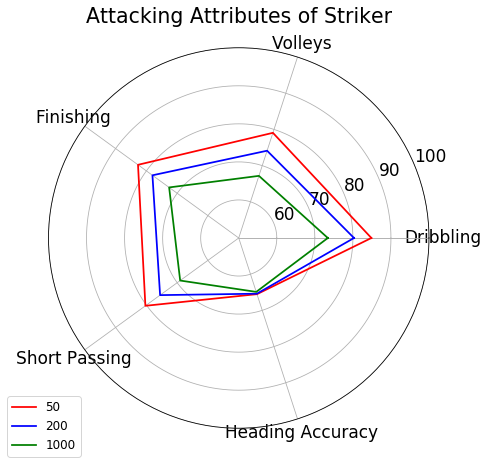

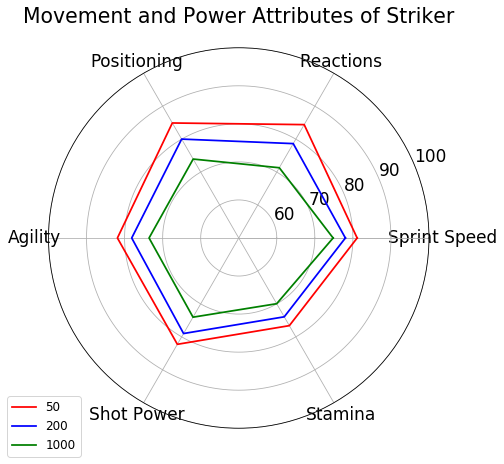

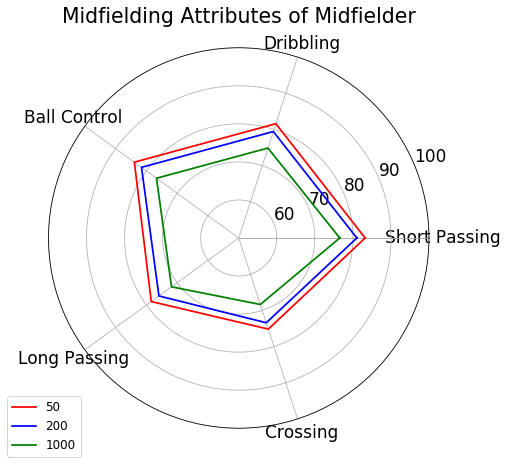

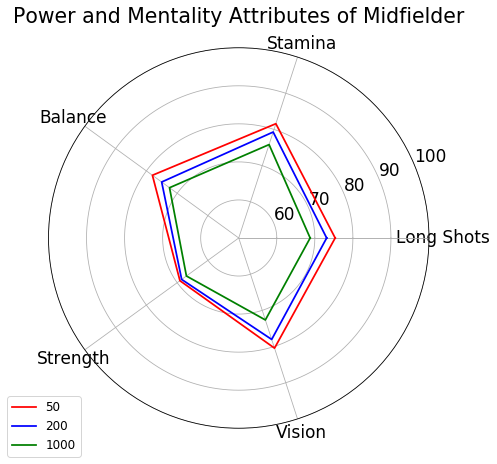

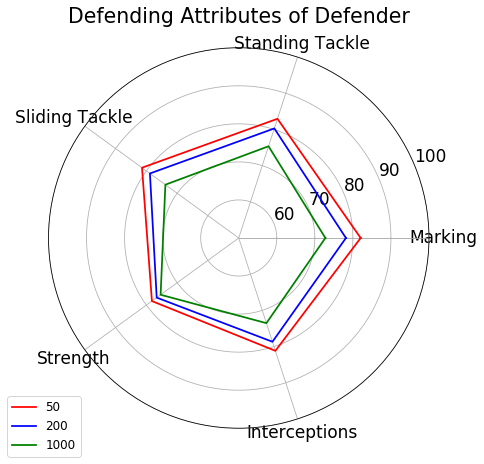

In [126]:
plot_all_3players([50,200,1000])

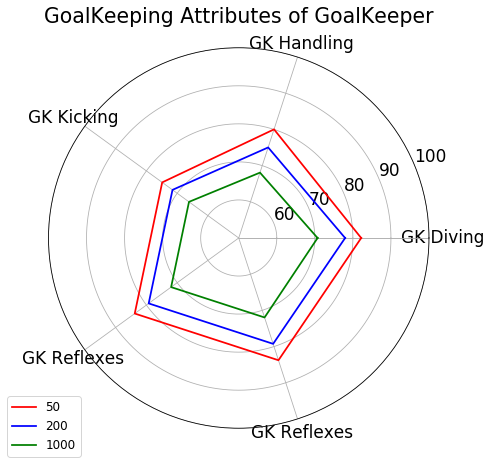

In [127]:
plot_goalkeeper([50,200,1000])